In [236]:
import pandas as pd
import numpy as np


In [237]:
! pwd

/Users/casports/Library/CloudStorage/GoogleDrive-albert.fdez95@gmail.com/Mi unidad/NUCLIO_DS_2425/03. MODULOS/M4 - Machine Learning/Clase 9 - Time Series


In [238]:
df = pd.read_csv("/Users/casports/Library/CloudStorage/GoogleDrive-albert.fdez95@gmail.com/Mi unidad/NUCLIO_DS_2425/03. MODULOS/M4 - Machine Learning/Clase 9 - Time Series/data/ts_kaggle_train.csv")

In [239]:
df.head()

,Unnamed: 0,date,unique_id,city_id,shop_id,item_category_id,item_id,monthly_average_price,monthly_sales
0,0,2013-01-31,12_11365,16,12,9,11365,1511.512626,30.0
1,1,2013-01-31,12_11369,16,12,9,11369,572.715278,30.0
2,2,2013-01-31,12_11370,16,12,9,11370,699.776786,30.0
3,3,2013-01-31,12_11373,16,12,9,11373,548.900000,6.0
4,4,2013-01-31,12_12231,16,12,49,12231,350.000000,3.0


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14484 entries, 0 to 14483
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14484 non-null  int64  
 1   date                   14484 non-null  object 
 2   unique_id              14484 non-null  object 
 3   city_id                14484 non-null  int64  
 4   shop_id                14484 non-null  int64  
 5   item_category_id       14484 non-null  int64  
 6   item_id                14484 non-null  int64  
 7   monthly_average_price  13262 non-null  float64
 8   monthly_sales          13756 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1018.5+ KB


In [241]:
df.describe()

,Unnamed: 0,city_id,shop_id,item_category_id,item_id,monthly_average_price,monthly_sales
count,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,13262.000000,13756.000000
mean,7241.500000,10.833333,31.967136,39.356808,8626.431925,916.089314,7.337889
std,4181.314985,6.227364,15.236351,20.439654,5905.273346,820.945949,7.915032
min,0.000000,0.000000,3.000000,2.000000,32.000000,4.928571,0.000000
25%,3620.750000,7.000000,22.000000,30.000000,4248.000000,299.000000,2.000000
50%,7241.500000,7.000000,31.000000,35.000000,6457.000000,649.000000,5.000000
75%,10862.250000,16.000000,44.000000,55.000000,12551.000000,1149.000000,9.000000
max,14483.000000,23.000000,59.000000,83.000000,22088.000000,9305.121212,30.000000


In [242]:
df.isnull().sum()

Unnamed: 0                  0
date                        0
unique_id                   0
city_id                     0
shop_id                     0
item_category_id            0
item_id                     0
monthly_average_price    1222
monthly_sales             728
dtype: int64

In [243]:
sorted(df["date"].unique())

['2013-01-31',
 '2013-02-28',
 '2013-03-31',
 '2013-04-30',
 '2013-05-31',
 '2013-06-30',
 '2013-07-31',
 '2013-08-31',
 '2013-09-30',
 '2013-10-31',
 '2013-11-30',
 '2013-12-31',
 '2014-01-31',
 '2014-02-28',
 '2014-03-31',
 '2014-04-30',
 '2014-05-31',
 '2014-06-30',
 '2014-07-31',
 '2014-08-31',
 '2014-09-30',
 '2014-10-31',
 '2014-11-30',
 '2014-12-31',
 '2015-01-31',
 '2015-02-28',
 '2015-03-31',
 '2015-04-30',
 '2015-05-31',
 '2015-06-30',
 '2015-07-31',
 '2015-08-31',
 '2015-09-30',
 '2015-10-31']

In [244]:
len(sorted(df["date"].unique()))

34

In [245]:
len(sorted(df["unique_id"].unique()))

426

In [246]:
del (df["Unnamed: 0"])

In [247]:
df

,date,unique_id,city_id,shop_id,item_category_id,item_id,monthly_average_price,monthly_sales
0,2013-01-31,12_11365,16,12,9,11365,1511.512626,30.0
1,2013-01-31,12_11369,16,12,9,11369,572.715278,30.0
2,2013-01-31,12_11370,16,12,9,11370,699.776786,30.0
3,2013-01-31,12_11373,16,12,9,11373,548.900000,6.0
4,2013-01-31,12_12231,16,12,49,12231,350.000000,3.0
...,...,...,...,...,...,...,...,...
14479,2015-10-31,7_5822,21,7,35,5822,NaN,NaN
14480,2015-10-31,7_6185,21,7,30,6185,NaN,NaN
14481,2015-10-31,7_6497,21,7,28,6497,NaN,NaN
14482,2015-10-31,7_7856,21,7,28,7856,NaN,NaN


In [248]:
df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d") 

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14484 entries, 0 to 14483
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   14484 non-null  datetime64[ns]
 1   unique_id              14484 non-null  object        
 2   city_id                14484 non-null  int64         
 3   shop_id                14484 non-null  int64         
 4   item_category_id       14484 non-null  int64         
 5   item_id                14484 non-null  int64         
 6   monthly_average_price  13262 non-null  float64       
 7   monthly_sales          13756 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 905.4+ KB


In [250]:
df

,date,unique_id,city_id,shop_id,item_category_id,item_id,monthly_average_price,monthly_sales
0,2013-01-31,12_11365,16,12,9,11365,1511.512626,30.0
1,2013-01-31,12_11369,16,12,9,11369,572.715278,30.0
2,2013-01-31,12_11370,16,12,9,11370,699.776786,30.0
3,2013-01-31,12_11373,16,12,9,11373,548.900000,6.0
4,2013-01-31,12_12231,16,12,49,12231,350.000000,3.0
...,...,...,...,...,...,...,...,...
14479,2015-10-31,7_5822,21,7,35,5822,NaN,NaN
14480,2015-10-31,7_6185,21,7,30,6185,NaN,NaN
14481,2015-10-31,7_6497,21,7,28,6497,NaN,NaN
14482,2015-10-31,7_7856,21,7,28,7856,NaN,NaN


In [251]:
df.drop_duplicates().equals(df) #si devuelve true no hay duplicados

True

In [252]:
import seaborn as sns

<Axes: xlabel='unique_id', ylabel='date'>

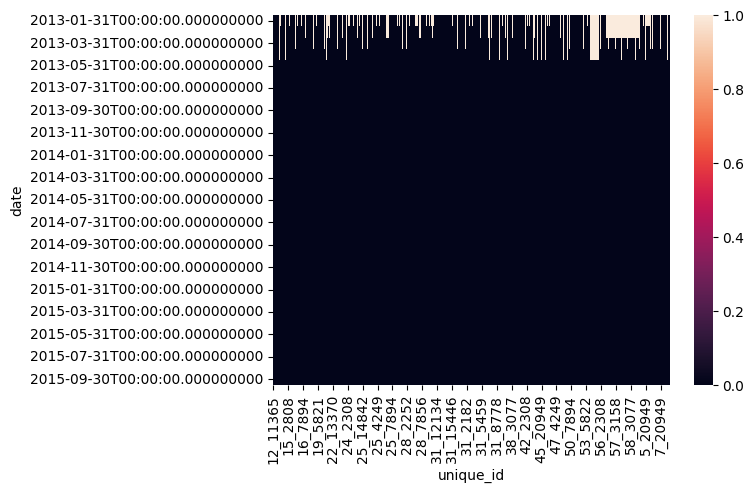

In [253]:
#aqui te dice que solo hay nulos al principio de los registros, pero tambien sabemos que los 0 son nulos porque no hay ventas

pt = (
    df
    .pivot_table(
        index = "date",
        columns = "unique_id",
        values = "monthly_sales",
        aggfunc = lambda series: sum(series)
    )
    .isnull()
)

sns.heatmap(pt)

<Axes: xlabel='unique_id', ylabel='date'>

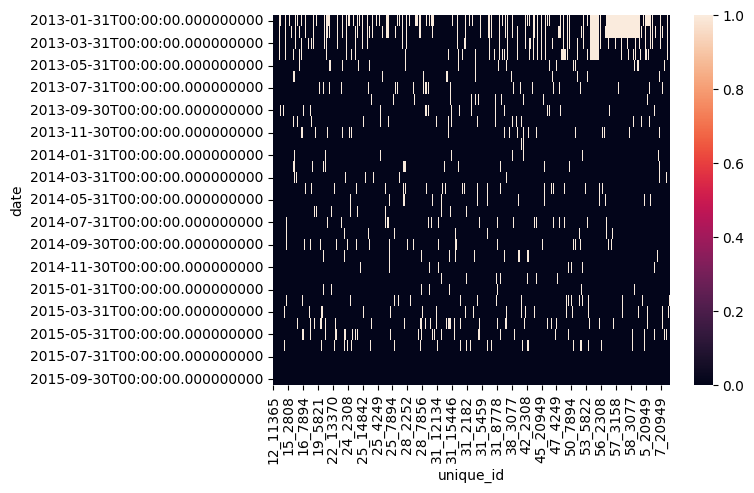

In [254]:
pt = (
    df
    .replace(0, np.nan)
    .pivot_table(
        index = "date",
        columns = "unique_id",
        values = "monthly_sales",
        aggfunc = lambda series: sum(series)
    )
    .isnull()
)

sns.heatmap(pt)

<Axes: xlabel='unique_id', ylabel='date'>

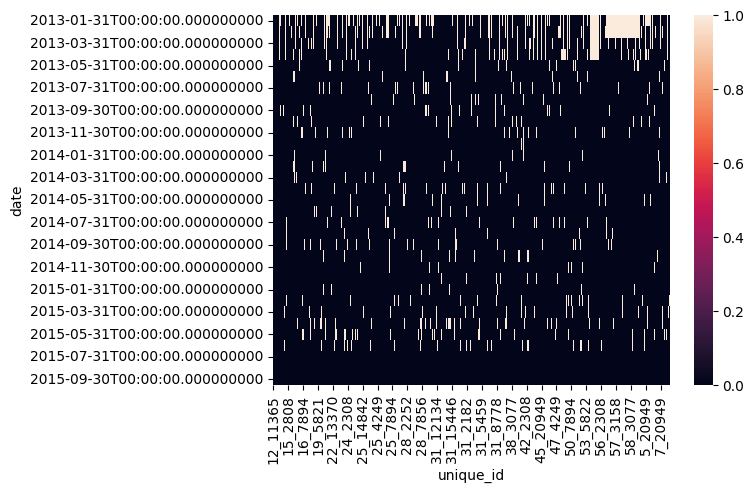

In [255]:
pt = (
    df
    .replace(0, np.nan)
    .pivot_table(
        index = "date",
        columns = "unique_id",
        values = "monthly_average_price",
        aggfunc = lambda series: sum(series)
    )
    .isnull()
)

sns.heatmap(pt)

In [256]:
df["monthly_sales"] = df["monthly_sales"].fillna(0)

In [257]:
df.isnull().sum()

date                        0
unique_id                   0
city_id                     0
shop_id                     0
item_category_id            0
item_id                     0
monthly_average_price    1222
monthly_sales               0
dtype: int64

In [258]:
ts = df[df["unique_id"] == "31_4249"][["date", "monthly_average_price"]]

In [259]:
ts["impute_mean"] = ts["monthly_average_price"].fillna(ts["monthly_average_price"].mean())
ts["impute_inter"] = ts["monthly_average_price"].interpolate()
ts["impute_bf"] = ts["monthly_average_price"].bfill()
ts["impute_bf_ff"] = ts["monthly_average_price"].ffill()

<Axes: xlabel='date'>

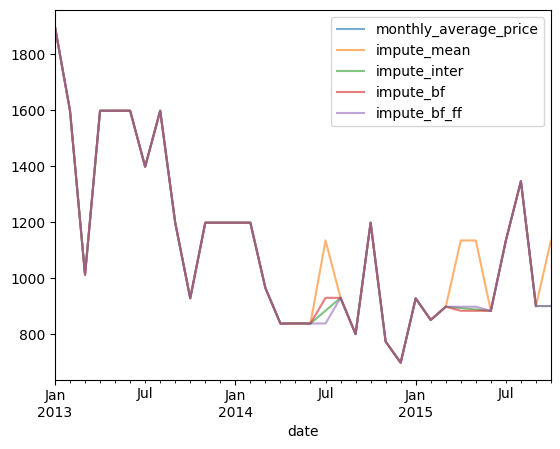

In [260]:
ts.set_index("date").plot(alpha = .6)

In [261]:
#esto no es correcto porque te coge el unique_id anterior y no el unique_id del mes anterior

#df["monthly_average_price] = df["monthly_average_price"].bfill().ffill()

In [262]:
gbdf = df.groupby(["unique_id"])

In [263]:
gbdf.get_group(("12_11365"))

/var/folders/8g/crnc9k7n5l7dzzv7nvvslql00000gp/T/ipykernel_28679/2608362335.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  gbdf.get_group(("12_11365"))


,date,unique_id,city_id,shop_id,item_category_id,item_id,monthly_average_price,monthly_sales
0,2013-01-31,12_11365,16,12,9,11365,1511.512626,30.0
7,2013-02-28,12_11365,16,12,9,11365,1533.125000,27.0
14,2013-03-31,12_11365,16,12,9,11365,3252.470238,30.0
21,2013-04-30,12_11365,16,12,9,11365,1590.515152,27.0
28,2013-05-31,12_11365,16,12,9,11365,1447.531250,30.0
35,2013-06-30,12_11365,16,12,9,11365,1302.343750,28.0
42,2013-07-31,12_11365,16,12,9,11365,1736.785714,20.0
49,2013-08-31,12_11365,16,12,9,11365,3072.361111,16.0
56,2013-09-30,12_11365,16,12,9,11365,9305.121212,24.0
63,2013-10-31,12_11365,16,12,9,11365,2493.113360,30.0


In [264]:
#esto queda raro, pasa algo

df.groupby(["unique_id"])["monthly_average_price"].bfill().ffill()

0        1511.512626
1         572.715278
2         699.776786
3         548.900000
4         350.000000
            ...     
14479    2689.900000
14480    2689.900000
14481    2689.900000
14482    2689.900000
14483    2689.900000
Name: monthly_average_price, Length: 14484, dtype: float64

In [265]:
df["monthly_average_price"] = df.groupby(["unique_id"])["monthly_average_price"].transform(
    lambda series: series.bfill().ffill()
)

In [ ]:
df.isnull().sum()

date                     0
unique_id                0
city_id                  0
shop_id                  0
item_category_id         0
item_id                  0
monthly_average_price    0
monthly_sales            0
dtype: int64

In [268]:
df["revenue"] = df["monthly_sales"] * df["monthly_average_price"]

#puedes sacar las ventas totales por tienda, por ciudad, por categoria, por item

In [ ]:
df.set_index("date").resample("Y")["monthly_sales"].sum()
#agrupo por año

/var/folders/8g/crnc9k7n5l7dzzv7nvvslql00000gp/T/ipykernel_28679/2912939555.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.set_index("date").resample("Y")["monthly_sales"].sum()


date
2013-12-31    35040.0
2014-12-31    39850.0
2015-12-31    26050.0
Freq: YE-DEC, Name: monthly_sales, dtype: float64

In [269]:
df.set_index("date").resample("3M")["monthly_sales"].sum()

#agrupo cada 3 meses

/var/folders/8g/crnc9k7n5l7dzzv7nvvslql00000gp/T/ipykernel_28679/3272065340.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("date").resample("3M")["monthly_sales"].sum()


date
2013-01-31     2303.0
2013-04-30     7374.0
2013-07-31     8744.0
2013-10-31     9186.0
2014-01-31    10941.0
2014-04-30     9699.0
2014-07-31     8487.0
2014-10-31     9601.0
2015-01-31    12778.0
2015-04-30     9455.0
2015-07-31     7275.0
2015-10-31     5097.0
Freq: 3ME, Name: monthly_sales, dtype: float64

In [276]:
#hay que sacar el shift para cada item de manera independiente

gbdf["monthly_sales_lag1"] =\
gbdf.groupby(["item_id"])["monthly_sales"].transform(
    lambda series: series.shift(1))

In [283]:
gbdf = (
    df
    .set_index("date")
    .groupby(["shop_id"])
    .resample('ME')
    ["monthly_sales"]
    .sum()
    .reset_index()
)

In [284]:
gbdf

,shop_id,date,monthly_sales
0,3,2013-01-31,2.0
1,3,2013-02-28,1.0
2,3,2013-03-31,1.0
3,3,2013-04-30,1.0
4,3,2013-05-31,3.0
...,...,...,...
1185,59,2015-06-30,46.0
1186,59,2015-07-31,48.0
1187,59,2015-08-31,68.0
1188,59,2015-09-30,30.0


In [285]:
#automatizamos el proceso

def build_ts_features(df, gb_list, target_column):
    
    new_name = "_".join(gb_list + [target_column])
    
    gbdf = (
        df
        .set_index("date")
        .groupby(gb_list)
        .resample("M")
        [target_column]
        .sum()
        .reset_index()
    )

    gbdf[f"{new_name}_lag_1"] =\
    gbdf.groupby(gb_list)[target_column].transform(
        lambda series: series.shift(1)
    )
    
    return gbdf

#si queremos añadir al df, hacemos un merge antes del return

In [286]:
build_ts_features(
    df = df,
    gb_list= ["item_id"],
    target_column = "monthly_sales"
)

/var/folders/8g/crnc9k7n5l7dzzv7nvvslql00000gp/T/ipykernel_28679/3427566366.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


,item_id,date,monthly_sales,item_id_monthly_sales_lag_1
0,32,2013-01-31,24.0,NaN
1,32,2013-02-28,20.0,24.0
2,32,2013-03-31,13.0,20.0
3,32,2013-04-30,11.0,13.0
4,32,2013-05-31,6.0,11.0
...,...,...,...,...
4483,22088,2015-06-30,10.0,17.0
4484,22088,2015-07-31,20.0,10.0
4485,22088,2015-08-31,24.0,20.0
4486,22088,2015-09-30,17.0,24.0
